<a href="https://colab.research.google.com/github/drishtiiii/Brain-Tumor-Detection-Using-VGG19-and-Resnet50/blob/main/brain_tumor_detection_using_vgg19_and_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/newarchive_3.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Mounted at /content/drive


In [ ]:
import os
from cv2 import imread
import matplotlib.pyplot as plt

import keras
from keras.layers import Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import ResNet50, VGG19

import warnings
warnings.filterwarnings("ignore")

In [ ]:
path = "/content/archive_3"

train_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=2,
    vertical_flip=2)
image_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=2,
    vertical_flip=2,
   validation_split=0.4)
dir1='/content/archive_3/train'
training_set = train_generator.flow_from_directory(batch_size=32,
                                                 directory=dir1,
                                                 shuffle=True,
                                                 target_size=(224,224),
                                                 subset="training",
                                                 color_mode='rgb',
                                                 class_mode='binary')

dir2='/content/archive_3/validation'
validation_set = image_generator.flow_from_directory(batch_size=32,
                                                 directory=dir2,
                                                 shuffle=True,
                                                 target_size=(224,224),
                                                 subset="validation",
                                                 color_mode='rgb',
                                                 class_mode='binary')

Found 1792 images belonging to 2 classes.
Found 482 images belonging to 2 classes.


<h4>Tumour MRI Image</h4>

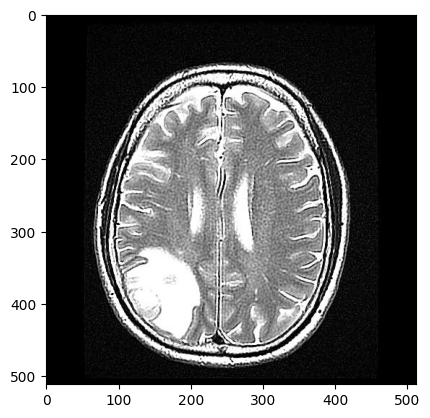

In [ ]:
yes_path = dir1+"/yes/"+os.listdir(dir1+"/yes/")[4]
tumour = imread(yes_path)
plt.imshow(tumour)

<h4>Normal MRI Image</h4>

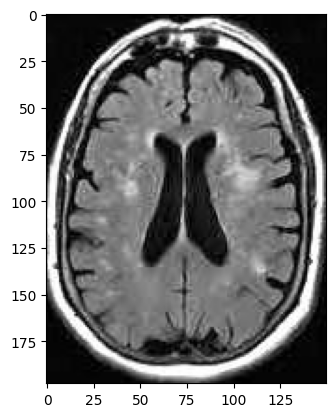

In [ ]:
no_path = dir2+"/no/"+os.listdir(dir2+"/no/")[4]
tumour = imread(no_path)
plt.imshow(tumour)

In [ ]:
training_set.class_indices

{'no': 0, 'yes': 1}

<h3>VGG 19</h3>

In [ ]:
model = VGG19(
      input_shape = (224,224,3),
      include_top = False,

    )


80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
for layers in model.layers:
    layers.trainable = False

In [ ]:
x = Flatten()(model.output)
x = Dropout(0.4)(x)

x = Dense(256, activation='relu')(x)
x = Dense(1, activation = "sigmoid")(x)


# Create the new model

model = keras.Model(model.input, x)
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
hist = model.fit_generator(training_set,validation_data = validation_set, epochs = 30,verbose=1,shuffle=True)

Epoch 1/30
56/56 [==============================] - 26s 220ms/step - loss: 0.9520 - accuracy: 0.7271 - val_loss: 0.3848 - val_accuracy: 0.8257
Epoch 2/30
56/56 [==============================] - 12s 215ms/step - loss: 0.2782 - accuracy: 0.8862 - val_loss: 0.2572 - val_accuracy: 0.8963
Epoch 3/30
56/56 [==============================] - 11s 200ms/step - loss: 0.1973 - accuracy: 0.9375 - val_loss: 0.1872 - val_accuracy: 0.9398
Epoch 4/30
56/56 [==============================] - 11s 195ms/step - loss: 0.1354 - accuracy: 0.9587 - val_loss: 0.1153 - val_accuracy: 0.9710
Epoch 5/30
56/56 [==============================] - 11s 200ms/step - loss: 0.1087 - accuracy: 0.9660 - val_loss: 0.0974 - val_accuracy: 0.9730
Epoch 6/30
56/56 [==============================] - 11s 200ms/step - loss: 0.0852 - accuracy: 0.9727 - val_loss: 0.0699 - val_accuracy: 0.9876
Epoch 7/30
56/56 [==============================] - 11s 200ms/step - loss: 0.0720 - accuracy: 0.9821 - val_loss: 0.0668 - val_accuracy: 0.9751

In [ ]:
hist = hist.history

In [ ]:
model.evaluate(validation_set )

16/16 [==============================] - 2s 140ms/step - loss: 0.0279 - accuracy: 0.9917


[0.02787361480295658, 0.9917012453079224]

Text(0, 0.5, 'accuracy')

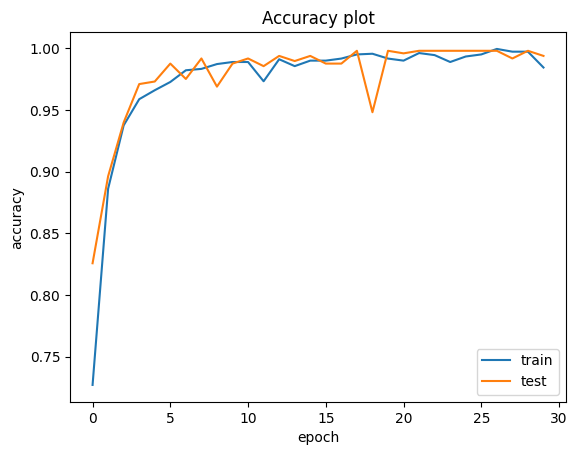

In [ ]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

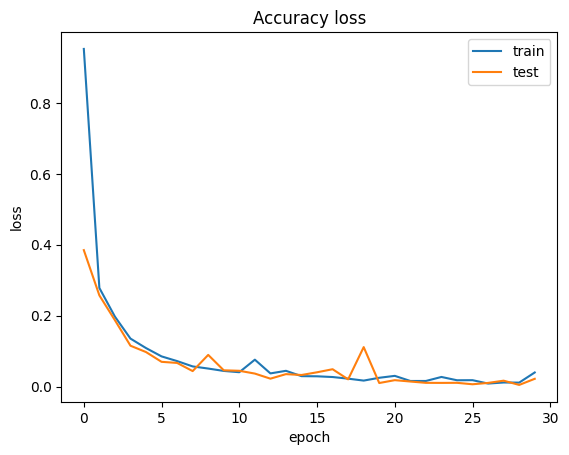

In [ ]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [ ]:
import numpy as np

In [ ]:
#testdir="/content/archive_3/validation2"
test_data = image_generator.flow_from_directory(
    dir2,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='binary',
    subset='validation')


# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)

Found 482 images belonging to 2 classes.
16/16 [==============================] - 3s 172ms/step


In [ ]:
predicted_labels = model.predict(test_data)

16/16 [==============================] - 3s 182ms/step


In [ ]:
predicted_label_index = np.argmax(predicted_labels, axis=None)

In [ ]:
predicted_labels_rounded = ((np.rint(predicted_labels.ravel())).astype(int))

In [ ]:
 #Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

16/16 [==============================] - 2s 140ms/step - loss: 0.0280 - accuracy: 0.9896
Test Loss: 0.027963005006313324
Test Accuracy: 0.9896265268325806


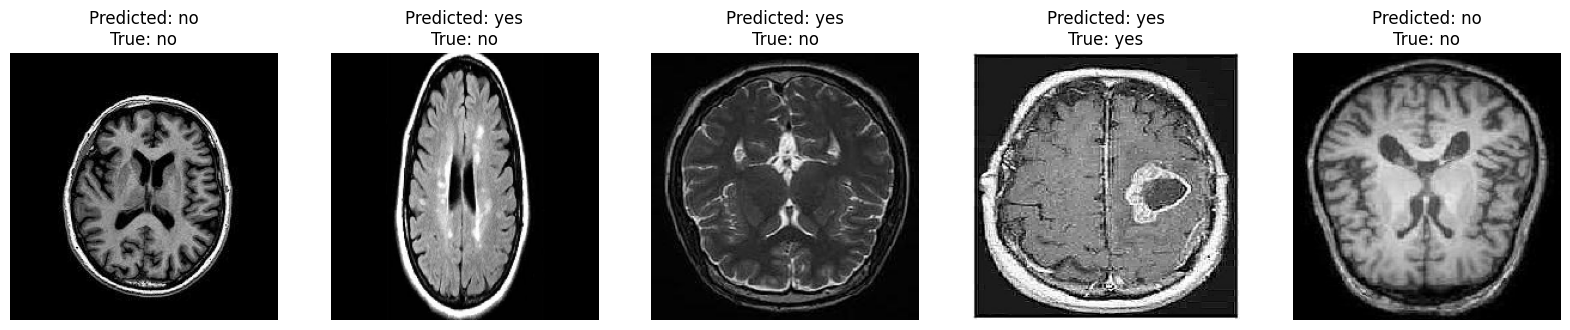

In [ ]:
import numpy as np

# Get a few images from the test set
# Get a few images and labels from the test set
num_images = 5
test_data_batch = next(test_data)
test_images = test_data_batch[0]
test_labels = test_data_batch[1]

# Convert one-hot encoded labels to class names
class_names = list(test_data.class_indices.keys())
true_labels = np.squeeze(test_labels).astype(int)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels_rounded]

# Plot the images with their predicted and true labels
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()


In [ ]:

# Generate the classification report
from sklearn.metrics import classification_report

# Ensure the arrays have the same number of samples
num_samples = min(len(true_labels), len(predicted_labels_rounded))
true_labels = true_labels[:num_samples]
predicted_labels_rounded = predicted_labels_rounded[:num_samples]

print(classification_report(true_labels, predicted_labels_rounded))

              precision    recall  f1-score   support

           0       0.70      0.32      0.44        22
           1       0.32      0.70      0.44        10

    accuracy                           0.44        32
   macro avg       0.51      0.51      0.44        32
weighted avg       0.58      0.44      0.44        32



In [ ]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels,predicted_labels_rounded)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[7 5]
 [5 7]]


In [ ]:
model.save('/content/archive_3/VGG19withCustomlayer.h5')



<h3>ResNet 50</h3>

In [ ]:
model = ResNet50(
      input_shape = (224,224,3),
      include_top = False,
    )


In [ ]:
for layers in model.layers:
    layers.trainable = False

In [ ]:
x = Flatten()(model.output)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation = "sigmoid")(x)

model = keras.Model(model.input, x)
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
hist = model.fit_generator(training_set,validation_data = validation_set, epochs = 50,verbose=1,shuffle=True)

Epoch 1/50
56/56 [==============================] - 15s 207ms/step - loss: 2.6697 - accuracy: 0.5586 - val_loss: 0.6455 - val_accuracy: 0.5519
Epoch 2/50
56/56 [==============================] - 11s 188ms/step - loss: 0.6238 - accuracy: 0.7132 - val_loss: 0.6009 - val_accuracy: 0.7822
Epoch 3/50
56/56 [==============================] - 11s 191ms/step - loss: 0.6007 - accuracy: 0.7567 - val_loss: 0.5763 - val_accuracy: 0.7863
Epoch 4/50
56/56 [==============================] - 11s 189ms/step - loss: 0.5888 - accuracy: 0.7628 - val_loss: 0.5533 - val_accuracy: 0.7656
Epoch 5/50
56/56 [==============================] - 11s 194ms/step - loss: 0.5806 - accuracy: 0.7640 - val_loss: 0.5818 - val_accuracy: 0.7573
Epoch 6/50
56/56 [==============================] - 10s 181ms/step - loss: 0.5612 - accuracy: 0.7796 - val_loss: 0.5478 - val_accuracy: 0.7884
Epoch 7/50
56/56 [==============================] - 10s 179ms/step - loss: 0.5470 - accuracy: 0.7812 - val_loss: 0.5185 - val_accuracy: 0.8071

In [ ]:
model.evaluate(validation_set )

16/16 [==============================] - 2s 121ms/step - loss: 0.2449 - accuracy: 0.9253


[0.2448999285697937, 0.9253112077713013]

In [ ]:
hist = hist.history

Text(0, 0.5, 'accuracy')

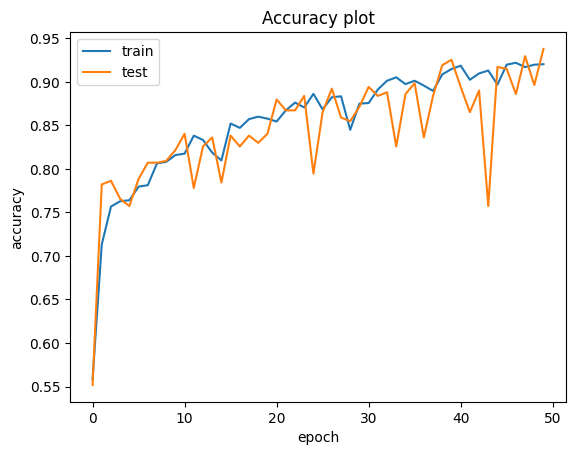

In [ ]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

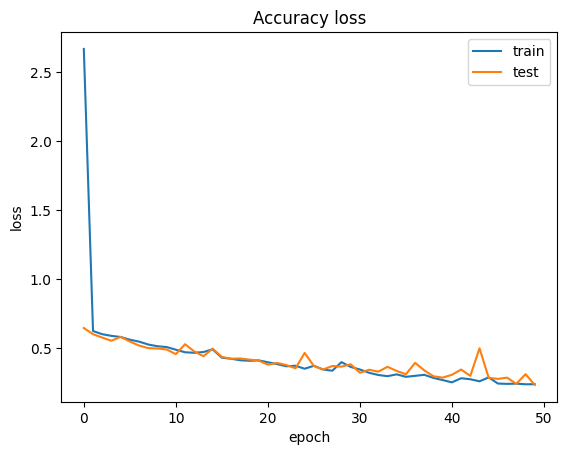

In [ ]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [ ]:
import numpy as np

In [ ]:
#testdir="/content/archive_3/validation2"
test_data = image_generator.flow_from_directory(
    dir2,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='binary',
    subset='validation')


# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)

Found 482 images belonging to 2 classes.
16/16 [==============================] - 3s 126ms/step


In [ ]:
predicted_labels = model.predict(test_data)

16/16 [==============================] - 3s 191ms/step


In [ ]:
predicted_label_index = np.argmax(predicted_labels, axis=None)

In [ ]:
predicted_labels_rounded = ((np.rint(predicted_labels.ravel())).astype(int))

In [ ]:
 #Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

16/16 [==============================] - 2s 121ms/step - loss: 0.2424 - accuracy: 0.9295
Test Loss: 0.24241352081298828
Test Accuracy: 0.9294605851173401


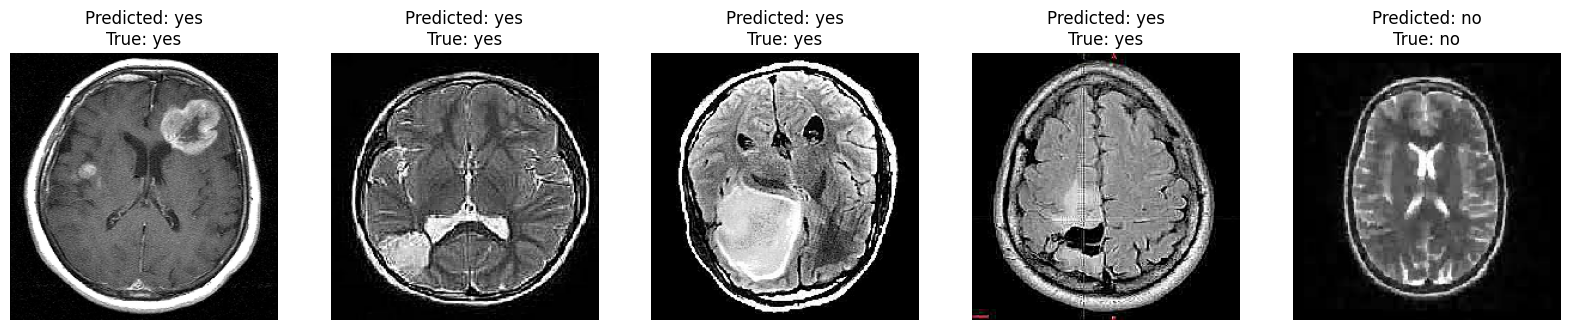

In [ ]:

import numpy as np

# Get a few images from the test set
# Get a few images and labels from the test set
num_images = 5
test_data_batch = next(test_data)
test_images = test_data_batch[0]
test_labels = test_data_batch[1]

# Convert one-hot encoded labels to class names
class_names = list(test_data.class_indices.keys())
true_labels = np.squeeze(test_labels).astype(int)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels_rounded]

# Plot the images with their predicted and true labels
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()

In [ ]:

# Generate the classification report
from sklearn.metrics import classification_report

# Ensure the arrays have the same number of samples
num_samples = min(len(true_labels), len(predicted_labels_rounded))
true_labels = true_labels[:num_samples]
predicted_labels_rounded = predicted_labels_rounded[:num_samples]

print(classification_report(true_labels, predicted_labels_rounded))


              precision    recall  f1-score   support

           0       0.43      0.90      0.58        10
           1       0.91      0.45      0.61        22

    accuracy                           0.59        32
   macro avg       0.67      0.68      0.59        32
weighted avg       0.76      0.59      0.60        32



In [ ]:

# Generate the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels,predicted_labels_rounded)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 9  1]
 [12 10]]


In [ ]:
model.save('/content/archive_3/ResNetwithCustomlayer.h5')

